In [41]:
import pandas as pd
import numpy as np
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sqlalchemy import create_engine


## this is a _Data_Engineer_interview

In [42]:
file_name="C:/Users/Guatavo/Documents/5toSemestre/ETL/wokshop_002/the_grammy_awards.csv"
#file_name="the_grammy_awards.csv"
df=pd.read_csv(file_name)
print(df.head())

   year                              title               published_at  \
0  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
1  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
2  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
3  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
4  2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   

                  updated_at            category     nominee         artist  \
0  2020-05-19T05:10:28-07:00  Record Of The Year     Bad Guy  Billie Eilish   
1  2020-05-19T05:10:28-07:00  Record Of The Year     Hey, Ma       Bon Iver   
2  2020-05-19T05:10:28-07:00  Record Of The Year     7 rings  Ariana Grande   
3  2020-05-19T05:10:28-07:00  Record Of The Year  Hard Place         H.E.R.   
4  2020-05-19T05:10:28-07:00  Record Of The Year        Talk         Khalid   

                                             workers  \
0  Finneas O'Connell, producer

# Analisis Exploratorio De Los Datos
## ¿Qué tipo de dato son las variables del conjunto de datos?

In [43]:
df.dtypes

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [44]:
(
    df
    .dtypes
    .value_counts()
)

object    8
int64     1
bool      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [45]:
df.shape

(4810, 10)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [46]:
(   df
    .isnull()
    .any()
)

year            False
title           False
published_at    False
updated_at      False
category        False
nominee          True
artist           True
workers          True
img              True
winner          False
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [47]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


workers         2190
artist          1840
img             1367
nominee            6
year               0
title              0
published_at       0
updated_at         0
category           0
winner             0
dtype: int64

### ¿Cuál es la proporción de valores nulos por cada variable?

C:\Users\Guatavo\anaconda3\envs\fundamentos-etl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


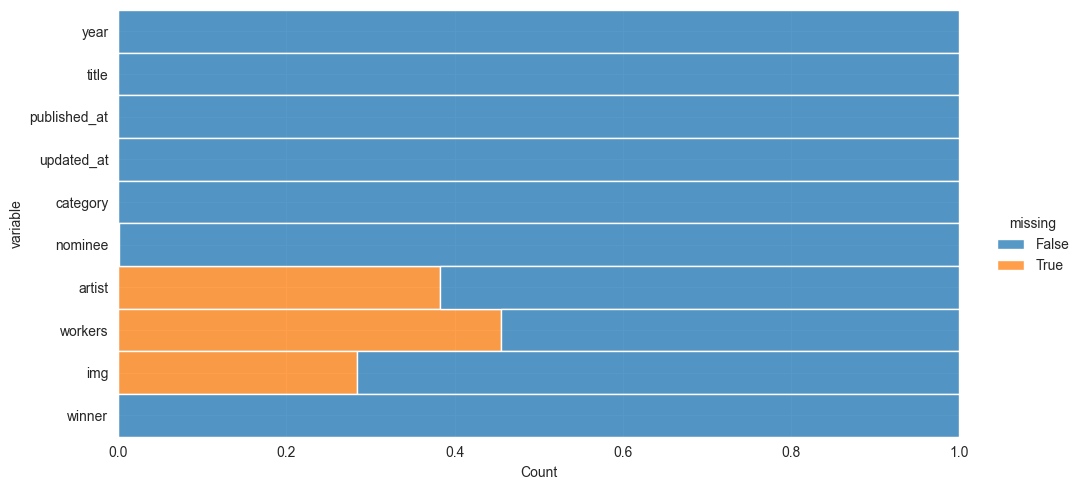

In [48]:
(
    df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [49]:
(
    df
    .isnull()
    .sum()
    .sum()
)

5403

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

#### Este grrafico nos permite ver los valores nulos que hay en las columnas de cada registro, por medio de una raya vertical, que indica ese valor en ese registro tiene un valor nulo , por la columnas que pasa la raya.

<Axes: >

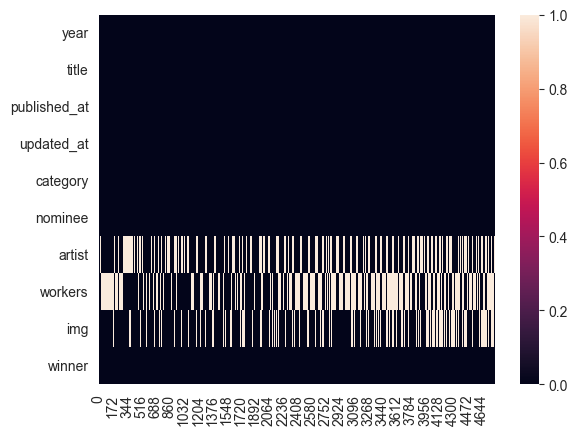

In [50]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)


Podemos observar, que la mayoria de los rregistros que tienen valores nulos, se Concentran en la columna artists workers,img, en mayor medida en la columna workers y lo podemos ver porque hay mayor cantidad de rayas  en el grafico.  

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [51]:
df_without_nulls = (
    df
    .dropna()
)

df_without_nulls

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...
4449,1966,9th Annual GRAMMY Awards (1966),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,Record Of The Year,Strangers In The Night,Frank Sinatra,"Jimmy Bowen, producer",https://www.grammy.com/sites/com/files/styles/...,True
4450,1966,9th Annual GRAMMY Awards (1966),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,Album Of The Year,A Man And His Music,Frank Sinatra,"Sonny Burke, producer",https://www.grammy.com/sites/com/files/styles/...,True
4492,1965,8th Annual GRAMMY Awards (1965),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Record Of The Year,A Taste Of Honey,Herb Alpert And The Tijuana Brass,"Herb Alpert & Jerry Moss, producers",https://www.grammy.com/sites/com/files/styles/...,True
4493,1965,8th Annual GRAMMY Awards (1965),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Album Of The Year,September Of My Years,Frank Sinatra,"Sonny Burke, producer",https://www.grammy.com/sites/com/files/styles/...,True


### perdemos una cantidad significativa,entonces exploramos mas a fondo a ver que datos podemos rellenar

### Cuantos Duplicados Tenemos?

In [52]:
duplicados = df.duplicated()
duplicados.sum()

0

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [53]:
df.describe(include='all')

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
count,4810.000000,4810,4810,4810,4810,4804,2970,2620,3443,4810
unique,NaN,62,4,10,638,4131,1658,2366,1463,1
top,NaN,62nd Annual GRAMMY Awards (2019),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Song Of The Year,Bridge Over Troubled Water,(Various Artists),"John Williams, composer (John Williams)",https://www.grammy.com/sites/com/files/styles/...,True
freq,NaN,433,4205,778,70,7,66,20,26,4810
mean,1995.566944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.149720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1958.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Solo las numéricas

In [54]:
df.describe(include=[np.number])

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


### Solo categóricas - 1

In [55]:
df.describe(include=object)

,title,published_at,updated_at,category,nominee,artist,workers,img
count,4810,4810,4810,4810,4804,2970,2620,3443
unique,62,4,10,638,4131,1658,2366,1463
top,62nd Annual GRAMMY Awards (2019),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Song Of The Year,Bridge Over Troubled Water,(Various Artists),"John Williams, composer (John Williams)",https://www.grammy.com/sites/com/files/styles/...
freq,433,4205,778,70,7,66,20,26


### Solo Booleano

In [56]:
df.describe(include=bool)

,winner
count,4810
unique,1
top,True
freq,4810


### Las Categorias con mas nominaciones cada año

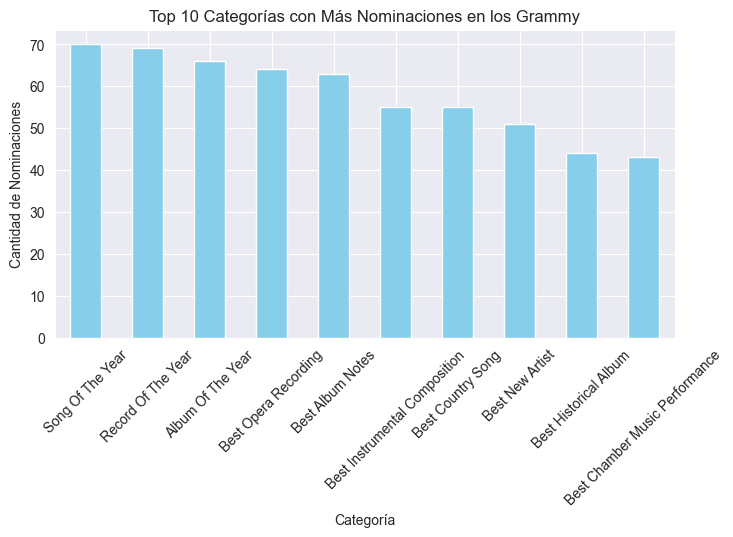

In [57]:
# 1. Filtrar las 10 categorías con más nominaciones
top_10_categories = df['category'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras
plt.figure(figsize=(8, 4))
top_10_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Nominaciones')
plt.title('Top 10 Categorías con Más Nominaciones en los Grammy')
plt.xticks(rotation=45)
plt.savefig('top_10_category.jpg', format='jpg')
plt.show()

## Top 10 artistas con mas nominaciones

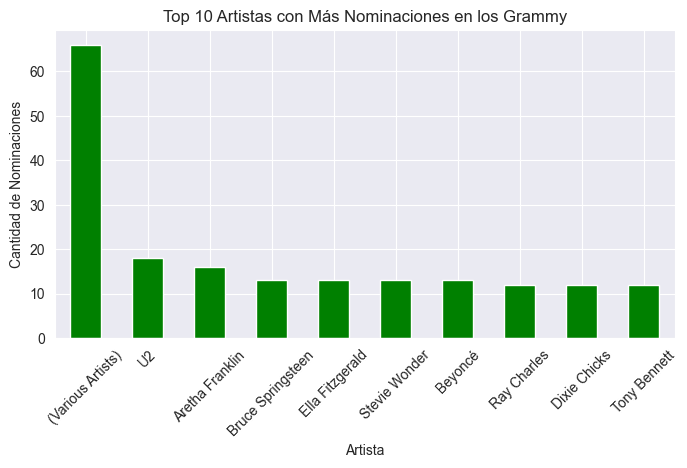

In [58]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = df['artist'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras con un tamaño más pequeño
plt.figure(figsize=(8, 4))  # Ancho x Alto en pulgadas
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Cantidad de Nominaciones')
plt.title('Top 10 Artistas con Más Nominaciones en los Grammy')
plt.xticks(rotation=45)

# 3. Guardar la gráfica en formato JPG
plt.savefig('top_10_artists.jpg', format='jpg')

# 4. Mostrar la gráfica en pantalla
plt.show()

## Top 10 canciones mas nominadas

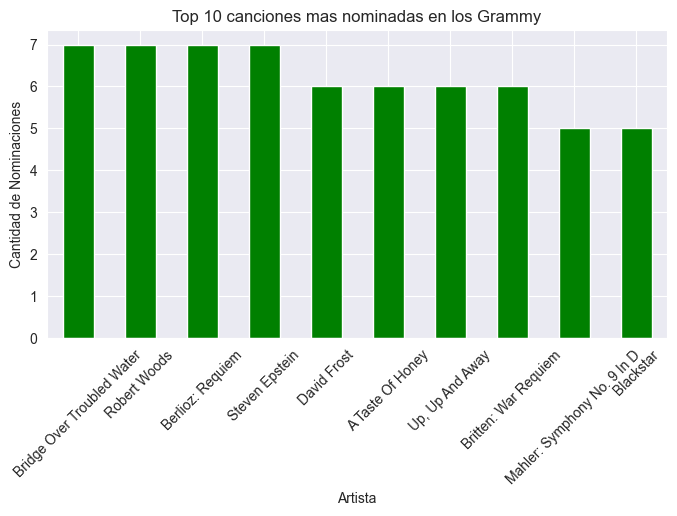

In [59]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = df['nominee'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras
plt.figure(figsize=(8, 4))
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Cantidad de Nominaciones')
plt.title('Top 10 canciones mas nominadas en los Grammy')
plt.xticks(rotation=45)
# 3. Guardar la gráfica en formato JPG
plt.savefig('top_10_nominee.jpg', format='jpg')
plt.show()

### Eliminamos la columnas innecesarias

### se eliminan img,workers,updated_at,published_at porque no nos aportan informacion relevante para nuestro analisis.  titlle se eliminan porque se puede inferir de que año son los premios de los grammys con la columna year

In [26]:
df.drop(['img', 'title', 'published_at', 'updated_at', 'workers'], axis=1, inplace=True)
df

,year,category,nominee,artist,winner
0,2019,Record Of The Year,Bad Guy,Billie Eilish,True
1,2019,Record Of The Year,"Hey, Ma",Bon Iver,True
2,2019,Record Of The Year,7 rings,Ariana Grande,True
3,2019,Record Of The Year,Hard Place,H.E.R.,True
4,2019,Record Of The Year,Talk,Khalid,True
...,...,...,...,...,...
4805,1958,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,NaN,True
4806,1958,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,NaN,True
4807,1958,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,NaN,True
4808,1958,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,NaN,True



## Normalizamos las Columnas a Mayusculas , excepto  winner y las numericas, para no tener problemas de Formato de las columnas


In [27]:
columns_to_exclude = [ "winner"]

# Aplica la conversión a mayúsculas a todas las columnas, excepto las excluidas
df[df.columns.difference(columns_to_exclude)] = df[df.columns.difference(columns_to_exclude)].applymap(lambda x: x.upper() if isinstance(x, str) else x)
df

,year,category,nominee,artist,winner
0,2019,RECORD OF THE YEAR,BAD GUY,BILLIE EILISH,True
1,2019,RECORD OF THE YEAR,"HEY, MA",BON IVER,True
2,2019,RECORD OF THE YEAR,7 RINGS,ARIANA GRANDE,True
3,2019,RECORD OF THE YEAR,HARD PLACE,H.E.R.,True
4,2019,RECORD OF THE YEAR,TALK,KHALID,True
...,...,...,...,...,...
4805,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,TCHAIKOVSKY: PIANO CONCERTO NO. 1 IN B FLAT MI...,NaN,True
4806,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,SEGOVIA GOLDEN JUBILEE,NaN,True
4807,1958,BEST CLASSICAL PERFORMANCE - CHAMBER MUSIC (IN...,BEETHOVEN: QUARTET 130,NaN,True
4808,1958,BEST CLASSICAL PERFORMANCE - VOCAL SOLOIST (WI...,OPERATIC RECITAL,NaN,True


## ESTO VA EN EL DOCUMENTO, Esto lo hacemos con el fin de buscar si hay mas registros con alguno de los nombres de las categorias, ya que de ser asi podriamos rellenar las Casillas que salen nulas.

Este no es el caso, ya que no existen mas registros con la categoria "REMIXER OF THE YEAR, NON-CLASSICAL" y  "BEST NEW COUNTRY &"

### Traemos los nulos de la columna nominee

In [28]:
null_nominee = df[df["nominee"].isnull()]
null_nominee

,year,category,nominee,artist,winner
2261,2000,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
2359,1999,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
2454,1998,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
2547,1997,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
4525,1965,BEST NEW COUNTRY & WESTERN ARTIST,NaN,NaN,True
4573,1964,BEST NEW COUNTRY & WESTERN ARTIST OF 1964,NaN,NaN,True


### Verificamos si existen mas registros que empiecen con nombre REMIXER en la columna category
### para validar si hay registros con el mismo nombre en la columna "category" y asi rellenarlo, de no ser asi seran borrados 

In [29]:
new_df = df[df["category"].str.startswith("REMIXER")]
new_df

,year,category,nominee,artist,winner
2261,2000,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
2359,1999,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
2454,1998,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True
2547,1997,"REMIXER OF THE YEAR, NON-CLASSICAL",NaN,NaN,True


### Verificamos si existen mas registros que empiecen con nombre BEST NEW COUNTRY & en la columna category
### para validar si rellenamos o borramos estos registros 

In [30]:
new_df = df[df["category"].str.startswith("BEST NEW COUNTRY &")]
new_df

,year,category,nominee,artist,winner
4525,1965,BEST NEW COUNTRY & WESTERN ARTIST,NaN,NaN,True
4573,1964,BEST NEW COUNTRY & WESTERN ARTIST OF 1964,NaN,NaN,True


## Eliminamos los registros ya que tienen columnas importantes para nuestro analisis vacias y ademas no se vio la forma de rellenarlos

In [31]:
# aqui eliminamos
df.drop([2261,2359,2454,2547,4525,4573], axis=0, inplace=True)
df

,year,category,nominee,artist,winner
0,2019,RECORD OF THE YEAR,BAD GUY,BILLIE EILISH,True
1,2019,RECORD OF THE YEAR,"HEY, MA",BON IVER,True
2,2019,RECORD OF THE YEAR,7 RINGS,ARIANA GRANDE,True
3,2019,RECORD OF THE YEAR,HARD PLACE,H.E.R.,True
4,2019,RECORD OF THE YEAR,TALK,KHALID,True
...,...,...,...,...,...
4805,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,TCHAIKOVSKY: PIANO CONCERTO NO. 1 IN B FLAT MI...,NaN,True
4806,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,SEGOVIA GOLDEN JUBILEE,NaN,True
4807,1958,BEST CLASSICAL PERFORMANCE - CHAMBER MUSIC (IN...,BEETHOVEN: QUARTET 130,NaN,True
4808,1958,BEST CLASSICAL PERFORMANCE - VOCAL SOLOIST (WI...,OPERATIC RECITAL,NaN,True


## Verificando los nulos de la columna Artist 

In [66]:
null_artist = df[df["artist"].isnull()]
null_artist

In [33]:
df

,year,category,nominee,artist,winner
0,2019,RECORD OF THE YEAR,BAD GUY,BILLIE EILISH,True
1,2019,RECORD OF THE YEAR,"HEY, MA",BON IVER,True
2,2019,RECORD OF THE YEAR,7 RINGS,ARIANA GRANDE,True
3,2019,RECORD OF THE YEAR,HARD PLACE,H.E.R.,True
4,2019,RECORD OF THE YEAR,TALK,KHALID,True
...,...,...,...,...,...
4805,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,TCHAIKOVSKY: PIANO CONCERTO NO. 1 IN B FLAT MI...,NaN,True
4806,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,SEGOVIA GOLDEN JUBILEE,NaN,True
4807,1958,BEST CLASSICAL PERFORMANCE - CHAMBER MUSIC (IN...,BEETHOVEN: QUARTET 130,NaN,True
4808,1958,BEST CLASSICAL PERFORMANCE - VOCAL SOLOIST (WI...,OPERATIC RECITAL,NaN,True


### Eliminamos la columnas innecesarias

### se eliminan img,workers,updated_at,published_at porque no nos aportan informacion relevante para nuestro analisis.  titlle se eliminan porque se puede inferir de que año son los premios de los grammys con la columna year

In [68]:
df.drop(['img', 'title', 'published_at', 'updated_at', 'workers'], axis=1, inplace=True)
df

## transformamos los datos de  la columna winner donde True =1 y False =0 . 

### Entendiendo que True significa que ganaron los premios, pero al 100 % de la columna tiene True , nos hace inferir de que lo mas probable es que no todos ganaron, entonces lo tomaremos solamente como que fueron nominados a los premios

In [70]:
df['winner'] = df['winner'].map({True: 1, False: 0})

627

### Verificamos los nulos de la columna artistas?

In [ ]:
columns_to_check = ["artist"]

# Verifica si hay valores nulos en las columnas especificadas
filas_con_nulos = df[df[columns_to_check].isnull().all(axis=1)]
filas_con_nulos

,year,category,nominee,artist,winner
16,2019,Song Of The Year,Bad Guy,NaN,True
17,2019,Song Of The Year,Always Remember Us This Way,NaN,True
18,2019,Song Of The Year,Bring My Flowers Now,NaN,True
19,2019,Song Of The Year,Hard Place,NaN,True
20,2019,Song Of The Year,Lover,NaN,True
...,...,...,...,...,...
4805,1958,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,NaN,True
4806,1958,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,NaN,True
4807,1958,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,NaN,True
4808,1958,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,NaN,True


In [38]:
# aqui hacer lo de artist

627

## Normalizando La Columna Categories

In [26]:
categories = {
    'Soundtracks/Music Videos------': [
        'Best Song Written For Visual Media',
        'Best Compilation Soundtrack For Visual Media',
        'Best Score Soundtrack For Visual Media',
        'Best Music Video',
        'Best Music Film'
    ],
    'Production/Engineering------': [
        'Best Instrumental Arrangement',
        'Best Arrangement, Instrumental or A Cappella',
        'Best Arrangement, Instruments and Vocals',
        'Best Recording Package',
        'Best Boxed Or Special Limited Edition Package',
        'Best Album Notes',
        'Best Historical Album',
        'Best Engineered Album, Non-Classical',
        'Producer Of The Year, Non-Classical',
        'Best Remixed Recording',
        'Best Immersive Audio Album',
        'Best Engineered Album, Classical',
        'Producer Of The Year, Classical'
    ],
    'Pop------': [
        'Pop',
        'Best Traditional Pop Performance',
        'Best Pop Vocal Performance By A Duo, Group Or Chorus',
        'Best Pop Vocal Performance By A Duo Or Group',
        'Best Pop Vocal Collaboration',
        'Best Pop Performance By A Duo Or Group With Vocal',
        'Best Pop Collaboration With Vocals',
        'Best Pop Instrumental Performance',
        'Best Pop Vocal Collaboration',
        'Best Pop Vocal Performance By A Group',
        'Best Pop Vocal Performance By A Male',
        'Best Pop Vocal Performance By A Female',
        'Best Pop Performance By A Duo Or Group With Vocals',
        'Best Contemporary Single/Album',
        'Best Contemporary Female Solo Vocal Performance',
        'Best Contemporary Male Solo Vocal Performance',
        'Best Contemporary Vocal Performance By A Duo, Group Or Chorus',
        'Best Contemporary Instrumental Performance',
        'Best Contemporary Song',
        'Best Contemporary Album',
        'Best Contemporary Pop Vocal Performance, Female',
        'Best Contemporary Pop Vocal Performance, Male',
        'Best Contemporary Pop Performance - Vocal Duo Or Group',
        'Best Contemporary Pop Performance, Chorus',
        'Best Contemporary Pop Performance, Instrumental',
        'Best Performance By A "Top 40" Artist',
        'Best Pop Instrumental Performance By An Instrumental Performer',
        'Best Pop Instrumental Performance By An Arranger, Composer, Orchestra And/Or Choral Leader',
        'Best Contemporary Performance By A Chorus',
        'Best Pop Instrumental Performance (Orchestra, Group Or Soloist)',
        'Best Pop Instrumental Performance, (Orchestra, Group Or Soloist)',
        'Best Pop Vocal Performance By A Duo Or Group With Vocal',
        'Best Pop Vocal Collaboration'
    ],
    'Dance/Electronic------': [
        'Dance/Electronic',
        'Best Dance Recording',
        'Best Dance/Electronic Album',
        'Best Electronic/Dance Album',
        'Best Dance/Electronica Album'
    ],
    'Rock/Metal/Alternative------': [
        'Rock/Metal/Alternative',
        'Best Rock Instrumental Performance (Orchestra, Group Or Soloist)',
        'Best Hard Rock/Metal Performance Vocal Or Instrumental',
        'Rock',
        'Best Rock Performance',
        'Best Metal Performance',
        'Best Rock Song',
        'Best Rock Album',
        'Best Alternative Music Album',
        'Hard Rock Performance',
        'Best Hard Rock Performance',
        'Best Rock Vocal Performance',
        'Best Rock Performance By A Duo Or Group With Vocals',
        'Best Hard Rock Performance With Vocal',
        'Best Rock Vocal Performance, Solo',
        'Best Rock Vocal Performance, Female',
        'Best Rock Vocal Performance, Male',
        'Best Rock Vocal Performance, Male Or Female',
        'Best Male Rock Vocal Performance',
        'Best Female Rock Vocal Performance',
        'Best Rock Vocal Performance By A Duo Or Group',
        'Best Rock Performance - Duo Or Group',
        'Best Rock Instrumental Performance',
        'Best Rock Instrumental Performance - Group Or Soloist With Group',
        'Best Rock Gospel Album',
        'Best Traditional Gospel Album',
        'Best Contemporary R&B Gospel Album',
        'Best Rock Vocal Performance By A Duo Or Group',
        'Best Rock & Roll Recording',
        'Best New Artist Of 1964',
        'Best Rock & Roll Solo Vocal Performance - Male Or Female',
        'Best Rock & Roll Group Performance, Vocal Or Instrumental',
        'Best New Artist Of 1963',
        'Best Solo Vocal Performance, Female',
        'Best Solo Vocal Performance, Male',
        'Best Rock & Roll Recording',
        'Best Rock & Roll Solo Vocal Performance, Female',
        'Best Rock & Roll Solo Vocal Performance, Male',
        'Best Rock & Roll Group Performance, Vocal Or Instrumental',
        'Best New Artist Of 1962',
        'Best Instrumental Theme Or Instrumental Version Of Song',
        'Best Performance By A Dance Band',
        'Best Performance By A Vocal Group Or Chorus',
        'Best Rock & Roll Solo Vocal Performance, Male Or Female'
    ],
    'R&B/Urban------': [
        'R&B/Urban',
        'R&B/Soul',
        'Best R&B Performance',
        'Best Traditional R&B Performance',
        'Best R&B Song',
        'Best Urban Contemporary Album',
        'Best R&B Instrumental Performance (Orchestra, Group Or Soloist)',
        'Best R&B Album',
        'Best R&B/Sung Collaboration',
        'Best Female R&B Vocal Performance',
        'Best Male R&B Vocal Performance',
        'Best R&B Performance By A Duo Or Group With Vocals',
        'Best Traditional R&B Vocal Performance',
        'Best Urban/Alternative Performance',
        'Best Contemporary R&B Album',
        'Best Contemporary R&B Gospel Album',
        'Best R&B Instrumental Performance',
        'Best Traditional R&B Vocal Album',
        'Best R&B Vocal Performance By A Duo, Group Or Chorus',
        'Best Rhythm & Blues Vocal Performance, Female',
        'Best Rhythm & Blues Vocal Performance, Male',
        'Best Rhythm & Blues Solo Vocal Performance, Female',
        'Best Rhythm & Blues Solo Vocal Performance, Male',
        'Best Rhythm & Blues Group Performance, Vocal Or Instrumental',
        'Best Rhythm & Blues Solo Vocal Performance, Male Or Female',
        'Best Rhythm & Blues Recording',
        'Best Rhythm & Blues Performance By A Duo Or Group, Vocal Or Instrumental',
        'Best Rhythm & Blues Performance',
        'Best Rhythm & Blues Performance, Female',
        'Best Rhythm & Blues Performance, Male',
        'Best R&B Vocal Performance By A Duo Or Group',
        'Best R&B Vocal Performance By A Group',
        'Best Soul Gospel Performance',
        'Best Rhythm & Blues Vocal Performance, Female',
        'Best Rhythm & Blues Vocal Performance, Male',
        'Best Rhythm & Blues Performance By A Duo Or Group, Vocal Or Instrumental',
        'Best Rhythm & Blues Vocal Performance By A Group',
        'Best Rhythm & Blues Vocal Performance, Female',
        'Best Rhythm & Blues Vocal Performance, Male',
        'Best Rhythm & Blues Vocal Performance By A Duo Or Group',
        'Best Rhythm & Blues Vocal Performance By A Group',
        'Best Contemporary (R&R) Recording',
        'Best Contemporary (R&R) Solo Vocal Performance - Male Or Female',
        'Best Contemporary (R&R) Group Performance, Vocal Or Instrumental',
        'Best Contemporary (R&R) Single',
        'Best Contemporary (R&R) Vocal Performance - Female',
        'Best Contemporary (R&R) Vocal Performance - Male',
        'Best Contemporary (R&R) Performance - Group (Vocal Or Instrumental)',
        'Best Rhythm & Blues Solo Vocal Performance, Male Or Female'
    ],
    'Rap/Hip-Hop------': [
        'Rap/Hip-Hop',
        'Best Rap Performance',
        'Best Rap/Sung Performance',
        'Best Rap Song',
        'Best Rap Album',
        'Best Rap/Sung Collaboration',
        'Best Rap Solo Performance',
        'Best Rap Performance By A Duo Or Group',
        'Best Female Rap Solo Performance',
        'Best Male Rap Solo Performance'
    ],
    'Country------': [
        'Country',
        'Best Country Solo Performance',
        'Best Country Duo/Group Performance',
        'Best Country Song',
        'Best Country Album',
        'Best Country Vocal Performance',
        'Best Country Vocal Performance, Female',
        'Best Country Vocal Performance, Male',
        'Best Country Performance By A Duo Or Group With Vocals',
        'Best Country Collaboration With Vocals',
        'Best Country Instrumental Performance',
        'Best Country Instrumental Performance (Orchestra, Group Or Soloist)',
        'Best Country Vocal Performance, Duet',
        'Best New Country Song',
        'Best Country Performance Duo Or Group',
        'Best New Country Song',
        'Best Southern Gospel, Country Gospel Or Bluegrass Gospel Album',
        'Best Mexican-American/Tejano Music Performance',
        'Best Gospel/Contemporary Christian Music Performance',
        'Best Gospel Song',
        'Best Contemporary Christian Music Song',
        'Best Gospel Album',
        'Best Contemporary Christian Music Album',
        'Best Roots Gospel Album',
        'Best Latin Pop Album',
        'Best Latin Rock, Urban or Alternative Album',
        'Best Regional Mexican Music Album (Including Tejano)',
        'Best Tropical Latin Album',
        'Best Traditional Blues Album',
        'Best Contemporary Blues Album',
        'Best Folk Album',
        'Best Regional Roots Music Album',
        'Best Folk Recording'
    ],
    'Jazz/Blues------': [
        'Jazz/Blues',
        'Jazz',
        'Jazz (Continuación)',
        'Best Jazz Fusion Performance',
        'Best Jazz Instrumental Performance Soloist (On A Jazz Recording)',
        'Best Large Jazz Ensemble Performance',
        'Best Jazz Vocal Album',
        'Best Jazz Instrumental Album',
        'Best Jazz Instrumental Album, Individual or Group',
        'Best Jazz Performance By A Soloist',
        'Best Jazz Performance By A Group',
        'Best Jazz Performance By A Big Band',
        'Best Jazz Instrumental Performance - Group Or Soloist With Group',
        'Best Jazz Instrumental Performance - Soloist Or Small Group',
        'Best Jazz Performance, Individual',
        'Best Jazz Performance, Group',
        'Best Jazz Performance, Big Band',
        'Best Contemporary Jazz Album',
        'Best Jazz Composition Of More Than Five Minutes Duration',
        'Best Jazz Performance - Soloist Or Small Group (Instrumental)',
        'Best Jazz Performance - Large Group (Instrumental)',
        'Best Performance By An Orchestra - For Dancing',
        'Best Performance By An Orchestra Or Instrumentalist With Orchestra - Primarily Not Jazz Or For Dancing',
        'Best Jazz Vocal Performance, Duo Or Group',
        'Best Jazz Instrumental Performance, Soloist (On A Jazz Recording)'
    ],
    'Gospel/Christian------': [
        'Gospel/Christian',
        'Gospel/Christian (Continuación)',
        'Best Gospel Performance, Contemporary Or Inspirational',
        'Best Gospel Performance (Other Than Soul Gospel)',
        'Best Gospel Vocal Performance',
        'Best Gospel Vocal Performance, Female',
        'Best Gospel Vocal Performance, Male',
        'Best Gospel Vocal Performance By A Duo, Group, Choir Or Chorus',
        'Best Soul Gospel Vocal Performance, Male Or Female',
        'Best Soul Gospel Vocal Performance Duo, Group, Choir Or Chorus',
        'Best Southern, Country Or Bluegrass Gospel Album',
        'Best Gospel Or Other Religious Recording (Musical)',
        'Best Gospel Performance By A Choir Or Chorus',
        'Best Rock Or Rap Gospel Album',
        'Best Southern, Country, Or Bluegrass Gospel Album',
        'Best Gospel Album By A Choir Or Chorus',
        'Best Gospel Album',
        'Best Contemporary Christian Music Performance/Song',
        'Best Contemporary Christian Music Album',
        'Best Gospel/Contemporary Christian Music Performance',
        'Best Traditional Gospel Album',
        'Best Reggae Album',
        'Best Latin Rock, Urban or Alternative Album',
        'Best Tejano Album',
        'Best Norteño Album',
        'Best Banda Album',
        'Best Latin Urban Album',
        'Best Gospel Vocal Performance, Female',
        'Best Gospel Vocal Performance, Male',
        'Best Gospel Vocal Performance By A Duo, Group, Choir Or Chorus',
        'Best Soul Gospel Vocal Performance, Male Or Female',
        'Best Soul Gospel Vocal Performance Duo, Group, Choir Or Chorus',
        'Best Gospel Performance, Contemporary',
        'Best Gospel Performance, Traditional',
        'Best Gospel Performance By A Duo Or Group',
        'Best Soul Gospel Performance By A Duo Or Group',
        'Best Gospel Performance, Contemporary Or Inspirational'
    ],
    'Latin------': [
        'Latin',
        'Best Latin Jazz Album',
        'Best Latin Pop Album',
        'Best Regional Mexican Music Album (Including Tejano)',
        'Best Tropical Latin Album',
        'Best Mexican/Mexican-American Album',
        'Best Latin Rock, Alternative Or Urban Album',
        'Best Traditional Tropical Latin Album',
        'Best Salsa/Merengue Album',
        'Best Latin Rock/Alternative Album',
        'Best Latin Urban Album',
        'Best Latin Pop, Rock, Or Urban Album',
        'Best Regional Mexican Or Tejano Album',
        'Best Banda Or Norteño Album',
        'Best Small Ensemble Performance',
        'Best Latin Pop Performance',
        'Best Latin Rock/Alternative Performance',
        'Best Traditional Tropical Latin Performance',
        'Best Salsa Performance',
        'Best Merengue Performance',
        'Best Mexican-American Performance',
        'Best Tejano Performance',
        'Best Latin Performance',
        'Best Latin Pop Performance',
        'Best Latin Rock/Alternative Performance',
        'Best Latin Urban Performance',
        'Best Traditional Tropical Latin Performance',
        'Best Salsa Performance',
        'Best Merengue Performance',
        'Best Mexican-American Music Performance',
        'Best Tejano Music Performance',
        'Best Latin Pop Performance - Duo Or Group',
        'Best Latin Rock Or Alternative Performance',
        'Best Traditional Latin Tropical Performance',
        'Best Salsa Or Merengue Performance',
        'Best Mexican-American Or Tejano Music Performance',
        'Best Latin Jazz Performance',
        'Best Latin Pop Performance - Female',
        'Best Latin Pop Performance - Male',
        'Best Latin Rock/Alternative Performance - Duo Or Group',
        'Best Latin Rock/Alternative Performance - Female',
        'Best Latin Rock/Alternative Performance - Male',
        'Best Latin Urban Performance - Duo Or Group',
        'Best Latin Urban Performance - Female',
        'Best Latin Urban Performance - Male',
        'Best Traditional Tropical Latin Performance - Female',
        'Best Traditional Tropical Latin Performance - Male',
        'Best Salsa Performance - Duo Or Group',
        'Best Merengue Performance - Duo Or Group',
        'Best Mexican-American Performance - Duo Or Group',
        'Best Tejano Music Performance - Duo Or Group',
        'Best Latin Jazz Performance - Duo Or Group',
        'Best Latin Jazz Performance - Male',
        'Best Latin Jazz Performance - Female'
    ],
    'Reggae------': [
        'Reggae',
        'Best Reggae Album'
    ],
    'World Music------': [
        'World Music',
        'Best World Music Album',
        'Best Traditional World Music Album',
        'Best Contemporary World Music Album',
        'Best Musical Album For Children',
        'Best Spoken Word Album For Children',
        'Best Spoken Word Album (Includes Poetry, Audio Books & Story Telling)',
        'Best Song Written For Visual Media',
        'Best Song Written For A Motion Picture, Television Or Other Visual Media.'
    ],
    'Children\'s/Spoken Word/Comedy------': [
        'Children\'s/Spoken Word/Comedy',
        'Best Comedy Album',
        'Best Spoken Word Album (Includes Poetry, Audio Books & Storytelling)',
        'Best Spoken Word Album',
        'Best Spoken Comedy Album',
        'Best Spoken Word Album for Children',
        'Best Boxed Recording Package',
        'Best Album For Children',
        'Best Musical Show Album'
    ],
    'Other------': [
        'Other',
        'Miscellaneous',
        'Best Compilation Soundtrack Album For A Motion Picture, Television Or Other Visual Media',
        'Best Score Soundtrack Album For A Motion Picture, Television Or Other Visual Media',
        'Best Song Written For A Motion Picture, Television Or Other Visual Media',
        'Best Instrumental Arrangement Accompanying A Vocalist(s)',
        'Best Spoken Word Album (Includes Poetry, Audio Books & Storytelling)',
        'Best New Age Album',
        'Best Traditional Folk Album',
        'Best Contemporary Folk Album',
        'Best Hawaiian Music Album',
        'Best Native American Music Album',
        'Best Zydeco Or Cajun Music Album',
        'Best Traditional World Music Album',
        'Best Contemporary World Music Album',
        'Best Musical Show Album',
        'Best Compilation Soundtrack Album For Motion Picture, Television Or Other Visual Media',
        'Best Score Soundtrack Album For Motion Picture, Television Or Other Visual Media',
        'Best Song Written For Motion Picture, Television Or Other Visual Media',
        'Best Classical Album',
        'Best Instrumental Soloist(s) Performance (With Orchestra)',
        'Best Instrumental Soloist Performance (Without Orchestra)',
        'Best Chamber Music Performance',
        'Best Classical Vocal Performance',
        'Best Classical Contemporary Composition',
        'Best Classical Crossover Album',
        'Best Regional Mexican Album',
        'Best Latin Rock Or Alternative Album',
        'Best Latin Urban Album',
        'Best Contemporary Folk/Americana Album',
        'Best Polka Album',
        'Best Pop Performance By A Duo Or Group With Vocal',
        'Best Sound Track Album/Recording',
        'Best Original Score Written For A Motion Picture Or A Television Special',
        'Best Producer Of The Year',
        'Best Album Notes (Classical)',
        'Best Engineered Recording (Non-Classical)',
        'Best Engineered Recording (Classical)',
        'Best Album Cover (Other Than Classical)',
        'Best Sound Track Album/Recording'
    ],
    'Classical------': [
        'Classical',
        'Classical (Continuación)',
        'Best Classical Engineered Recording',
        'Classical Producer Of The Year',
        'Classical Producer Of The Year, Classical',
        'Best Choral Performance, Classical (Other Than Opera)',
        'Best Classical Performance - Instrumental Soloist Or Soloists (With Orchestra)',
        'Best Classical Performance - Instrumental Soloist OR Soloists (With Orchestra)',
        'Best Classical Performance- Instrumental Soloist Or Soloists (Without Orchestra)',
        'Best Classical Performance - Instrumentalist (With Concerto Scale Accompaniment)',
        'Best Classical Performance - Instrumentalist (Other Than Concerto-Scale Accompaniment)',
        'Best Classical Performance - Operatic Or Choral',
        'Best Classical Vocal Soloist Performance (With Or Without Orchestra)',
        'Best Classical Performance, Instrumental Soloist(s) (With Orchestra)',
        'Best Classical Performance, Instrumental Soloist(s) (Without Orchestra)',
        'Best Classical Performance - Chamber Music (Including Chamber Orchestra)',
        'Best Classical Performance - Concerto Or Instrumental Soloist (With Full Orchestral Accompaniment)',
        'Best Choral Performance (Other Than Opera)',
        'Best Classical Performance, Instrumental Soloist (With Orchestra)',
        'Best Classical Performance, Instrumental Soloist (Without Orchestra)',
        'Best Chamber Music Or Other Small Ensemble Performance',
        'Best Engineered Recording - Classical',
        'Best Orchestral Recording',
        'Best Classical Performance - Instrumental Soloist(s) (With Orchestra)',
        'Best Classical Performance - Instrumental Soloist(s) (Without Orchestra)',
        'Best Classical Orchestral Recording',
        'Best Album Notes, Classical',
        'Best New Classical Artist',
        'Best New Classical Composition',
        'Best Classical Performance - Concerto Or Instrumental Soloist (Other Than Full Orchestral Accompaniment)',
        'Best Classical Performance - Vocal Soloist',
        'Best Classical Opera Production',
        'Album Of The Year - Classical',
        'Album Of The Year, Classical',
        'Best Engineered Recording',
        'Best Engineered Recording - Classical',
        'Best Engineered Recording - Non-Classical',
        'Best Engineered Recording (Classical)',
        'Best Engineered Recording (Non-Classical)',
        'Album Of Best Original Score Written For A Motion Picture Or Television Special',
        'Best Classical Chamber Music Performance - Instrumental Or Vocal',
        'Best Classical Performance, Orchestra',
        'Best Composition By A Contemporary Classical Composer',
        'Most Promising New Classical Recording Artist',
        'Best Album Notes, Classical',
        'Best Album Cover, Photography',
        'Best Album Cover, Graphic Arts',
        'Best Album Cover - Other Than Classical',
        'Best Album Cover - Classical',
        'Best Engineering Contribution - Classical Recording',
        'Best Engineered Record (Classical)',
        'Best Engineered Recording - Classical',
        'Best Engineered Recording - Other Than Classical Or Novelty'
    ],
    'Production/Engineering------': [
        'Production/Engineering',
        'Best Engineered Album - Non-Classical',
        'Producer Of The Year',
        'Producer Of The Year, Non-Classical',
        'Best Engineered Recording - Special Or Novel Effects',
        'Best Engineering Contribution - Other Than Classical Or Novelty',
        'Best Engineering Contribution - Novelty Recording',
        'Best Engineering Contribution',
        'Best Engineering Contribution - Popular Recording',
        'Best Engineering Contribution - Other Than Classical Or Novelty'
    ],
    'Children\'s Album------': [
        'Children\'s Album',
        'Best Album For Children',
        'Best Children\'s Music Album',
        'Best Recording For Children',
        'Best Musical Cast Show Album'
    ],
    'Surround Sound Album------': [
        'Surround Sound Album',
        'Best Surround Sound Album'
    ],
    'Soundtracks/Music Videos------': [
        'Soundtracks/Music Videos',
        'Best Compilation Soundtrack Album For Visual Media',
        'Best Score Soundtrack Album For Visual Media',
        'Best Music Video',
        'Best Music Film'
    ],
    'Folk/World Music------': [
        'Folk/World Music',
        'Best Folk Recording',
        'Best Traditional Pop Vocal Performance',
        'Best Traditional Pop Vocal Performance, Male Or Female',
        'Best Traditional Pop Vocal Performance - Male',
        'Best Traditional Pop Vocal Performance - Female',
        'Best Pop Vocal Collaboration',
        'Best Country Vocal Collaboration',
        'Best Latin Pop Performance - Duo Or Group',
        'Best Pop Performance By A Duo Or Group With Vocals',
        'Best Pop Collaboration With Vocals',
        'Best Pop Instrumental Performance',
        'Best Pop Vocal Collaboration',
        'Best Contemporary Single/Album'
    ],
    'Spoken Word Album/Documentary/Drama------': [
        'Spoken Word Album',
        'Best Spoken Word Album',
        'Best Spoken Word Or Drama Recording',
        'Best Spoken Word Album (Includes Poetry, Audio Books & Storytelling)',
        'Best Comedy Recording',
        'Best Comedy Performance',
        'Best Comedy Album',
        'Best Comedy Album',
        'Best Comedy Album',
        'Best Spoken Word Album for Children',
        'Best Spoken Word Or Non-Musical Album',
        'Best Spoken Word Or Non-Musical Recording',
        'Best Comedy Recording',
        'Best Spoken Word Or Drama Recording',
        'Best Comedy Album',
        'Best Spoken Word, Documentary Or Drama',
        'Best Spoken Word Recording',
        'Best Spoken Word Album',
        'Best Spoken Word Or Drama Recording',
        'Best Spoken Comedy Album',
        'Best Spoken Word Album for Children',
        'Best Spoken Word Or Non-Musical Album',
        'Best Documentary, Spoken Word Or Drama Recording (Other Than Comedy)',
        'Best Comedy Performance',
        'Best Comedy Album',
        'Best Comedy Performance - Spoken Word'
    ],
    'Song Written For Visual Media------': [
        'Song Written For Visual Media',
        'Best Song Written For Visual Media',
        'Best Song Written For A Motion Picture, Television Or Other Visual Media.',
        'Best Song Written Specifically For A Motion Picture Or For Television',
        'Best Song Written For A Motion Picture, Television Or Other Visual Media.',
        'Best Song Written For A Motion Picture Or For Television',
        'Best Rhythm & Blues Song',
        'Best Original Score Written For A Motion Picture Or A Television Show',
        'Best Original Score Written For A Motion Picture Or A Television Special',
        'Best Original Score From A Motion Picture Or Television Show',
        'Best Composition By A Contemporary Composer',
        'Best Contemporary Composition'
    ],
    'Instrumental Soloist Performance------': [
        'Instrumental Soloist Performance',
        'Best Instrumental Composition',
        'Best Instrumental Composition Written For A Motion Picture, Television Or Other Visual Media.',
        'Best Instrumental Soloist(s) Performance (With Orchestra)',
        'Best Instrumental Soloist Performance (Without Orchestra)',
        'Best Instrumental Performance',
        'Best Classical Choral Performance',
        'Best Instrumental Arrangement',
        'Best Instrumental Arrangement With Accompanying Vocal(s)',
        'Best Arrangement Accompanying Vocals/Instrumentals',
        'Best Instrumental Arrangement Accompanying A Vocalist(s)',
        'Best Instrumental Arrangement Accompanying Vocal(s)'
    ],
    'Southern/Country/Bluegrass Gospel------': [
        'Southern/Country/Bluegrass Gospel',
        'Best Southern, Country, Or Bluegrass Gospel Album',
        'Best Traditional Soul Gospel Album',
        'Best Contemporary Soul Gospel Album',
        'Best Gospel Choir Or Chorus Album',
        'Best Gospel Album By A Choir Or Chorus'
    ],
    'Mexican-American/Tejano Music------': [
        'Mexican-American/Tejano Music',
        'Best Mexican-American Music Performance',
        'Best Tejano Music Performance',
        'Best Mexican-American Album'
    ],
    'Étnico y Tradicional------': [
        'Best Ethnic Or Traditional Recording',
        'Best Ethnic Or Traditional Folk Recording',
        'Best Latin Recording',
        'Best Ethnic Or Traditional Recording (Including Traditional Blues)',
        'Best Traditional Soul Gospel Performance',
        'Best Traditional Blues Recording',
        'Best Contemporary Blues Recording',
        'Best Traditional Folk Recording',
        'Best Polka Recording',
        'Best Gospel Performance, Female',
        'Best Gospel Performance, Male',
        'Best Gospel Performance Contemporary Or Inspirational',
        'Best Southern Gospel Album',
        'Best Album Package',
        'Best Album Cover - Photography',
        'Best Album Cover - Graphic Arts',
        'Best Album Cover - Boxed',
        'Best Album Or Original Instrumental Background Score Written For A Motion Picture Or Television',
        'Best Album Of Original Score Written For A Motion Picture Or A Television Special',
        'Best Album Of Original Instrumental Background Score Written For A Motion Picture Or Television',
        'Música de Escena y Musicales'
    ],
    'Video y Multimedia------': [
        'Best Performance Music Video',
        'Best Concept Music Video',
        'Best Video, Short Form',
        'Best Video Album'
    ],
    'Otras Categorías Relacionadas------': [
        'Producer Of The Year, (Non-Classical)',
        'Best New Age Recording',
        'Best Inspirational Performance',
        'Best New Artist Of 1963',
        'Best Album Cover - Other Than Classical'
    ],
    'Música de Escena y Musicales ------': [
        'Best Musical Cast Show Album',
        'Best Album Of Original Instrumental Background Score Written For A Motion Picture Or Television Special',
        'Best Song Written Specifically For A Motion Picture Or Television',
        'Best Album Of Original Score Written For A Motion Picture Or Television Special',
        'Best Original Score Written For A Motion Picture Or A Television Special',
        'Best Sound Track Album Or Recording Of Music Score From Motion Picture Or Television'
    ],
    'Arrangement Categories--------': [
        'Best Arrangement, Instrumental or A Cappella',
        'Best Arrangement, Instruments and Vocals',
        'Best Arrangement On An Instrumental',
        'Best Arrangement On An Instrumental Recording',
        'Best Arrangement Accompanying Vocalist(s)',
        'Best Arrangement For Voices',
        'Best Arrangement Accompanying Vocal(s)',
        'Best Arrangement Accompanying Vocals',
        'Best Arrangement For Voices (Duo, Group Or Chorus)',
        'Best Arrangement Accompanying Vocalists',
        'Best Accompaniment Arrangement For Vocalist(s) Or Instrumentalist(s)',
        'Best Background Arrangement (Behind vocalist or instrumentalist)'
    ],
    'Main Recording Categories---------:': [
        'Record Of The Year',
        'Album Of The Year',
        'Song Of The Year',
        'Best New Artist',
        'Best American Roots Performance',
        'Best American Roots Song',
        'Best Americana Album',
        'Best Bluegrass Album',
        'Best Musical Theater Album',
        'Best Compilation Soundtrack For Visual Media',
        'Best Score Soundtrack For Visual Media',
        'Best Immersive Audio Album',
        'Best Orchestral Performance',
        'Best Opera Recording',
        'Best Choral Performance',
        'Best Chamber Music/Small Ensemble Performance',
        'Best Blues Album',
        'Best Gospel Performance',
        'Best Alternative Music Performance',
        'Best Soundtrack Album',
        'Best Recording Package',
        'Best Boxed Or Special Limited Edition Package',
        'Best Album Notes',
        'Best Historical Album',
        'Best Remixed Recording'
    ],
    'Recording and Performance Categories----': [
        'Best Cast Show Album',
        'Best Sacred Performance',
        'Best Sacred Performance (Musical)',
        'Best Folk Performance',
        'Best Vocal Performance Single Record Or Track, Female',
        'Best Vocal Performance Album, Female',
        'Best Vocal Performance Single Record Or Track, Male',
        'Best Vocal Performance Album, Male',
        'Best Performance By A Band For Dancing',
        'Best Performance By An Orchestra',
        'Best Performance By A Vocal Group (2 To 6)',
        'Best Performance By A Chorus (7 Or More Persons)',
        'Best Show Album (Original Cast)',
        'Best Performance - Folk',
        'Best Album Created For Children',
        'Best Musical Composition First Recorded And Released In 1959 (More Than 5 Minutes Duration)',
        'Best Musical Composition First Recorded And Released In 1958 (Over 5 Minutes Duration)',
        'Best Original Cast Album (Broadway Or TV)',
        'Best Sound Track Album, Dramatic Picture Score Or Original Cast',
        'Best Performance, Documentary Or Spoken Word',
    ],
    'Composition and Lyrics Categories-----': [
        'Best Original Score Written For A Motion Picture Or Television Show',
        'Best Original Score Written For A Motion Picture Or A Television Show',
        'Best Original Score Written For A Motion Picture Or A Television Special',
        'Best Contemporary Single',
        'Best Contemporary Group Performance (Vocal Or Instrumental)',
    ],
    'Musical Arrangement Categories----': [
        'Best Arrangement Accompanying A Vocalist Or Instrumentalist',
        'Best Arrangement',
        'Best Vocal Arrangement For Two Or More Voices',
        'Best Arrangement Accompanying Vocalist(s)',
        'Best Arrangement For Voices',
        'Best Background Arrangement',
    ],
    'Album and Specific Recording Categories-----': [
        'Best Historical Reissue Album',
        'Best Disco Recording',
        'Best Historical Reissue',
        'Best Historical Repackage Album',
        'Best Sound Track Album Or Recording Of Score From Motion Picture Or Television',
        'Best Sound Track Album Or Recording Of Original Cast From Motion Picture Or Television',
        'Best Sound Track Album - Background Score From A Motion Picture Or Television',
        'Best Sound Track Album, Original Cast - Motion Picture Or Television',
        'Best Broadway Show Album',
        'Best Album Cover',
        'Best Album Package',
        'Best Album Notes',
        'Best Boxed Or Special Limited Edition Package',
    ],
    'Special Categories----': [
        'Video Of The Year',
        'Best Video (if applicable)',
    ],
     'Categories Related to Vocal and Group Performances---': [
        'Best Contemporary Vocal Performance, Female',
        'Best Contemporary Vocal Performance, Male',
        'Best Contemporary Vocal Performance By A Group',
        'Best Vocal Soloist Performance',
        'Best Vocal Performance, Female',
        'Best Vocal Performance, Male',
        'Best Performance By A Vocal Group',
        'Best Performance By A Chorus'
    ],
    'Categories Related to Classical Music Recordings---': [
        'Best Instrumental Soloist With Orchestra',
        'Best Performance Of A Choral Work',
        'Best Performance - Instrumental Soloist Or Soloists (With Orchestra)',
        'Best Performance - Instrumental Soloist Or Soloists (Without Orchestra)',
        'Best Vocal Soloist Performance (With Or Without Orchestra)'
    ],
    'Categories Related to Theater and Film Recordings---': [
        'Best Score From The Original Cast Show Album',
        'Best Score From An Original Cast Show Album',
        'Best Original Cast Show Album',
        'Best Sound Track Album Or Recording Of Original Cast From A Motion Picture Or Television'
    ],
    'Categories Related to Specific Music Genres---': [
        'Best Bluegrass Recording',
        'Best Salsa Album',
        'Best Merengue Album',
        'Best R&B Vocal Performance, Female',
        'Best R&B Vocal Performance, Male'
    ],
    'Music Video Categories---': [
        'Best Short Form Music Video',
        'Best Long Form Music Video'
    ],
    'Categorías de Grabación Contemporánea y de Instrumentales----': [
        'Best Contemporary Instrumental Album',
        'Best New Age Performance',
        'Best Contemporary Folk Recording',
    ],
    'Categorías Relacionadas con Grabaciones de Teatro y Cine---': [
        'Categories Related to Theater and Film Recordings',
        'Best Musical Theater Album',
        'Best Compilation Soundtrack For Visual Media',
        'Best Score Soundtrack For Visual Media',
        'Best Original Score Written For A Motion Picture Or A Television Show',
        'Best Original Score From A Motion Picture Or Television Show',
        'Best Original Score Written For A Motion Picture Or A Television Special',
        'Música de Escena y Musicales',
    ],
    'Categorías Relacionadas con Interpretaciones Vocales y de Grupos----': [
        'Best Vocal Soloist Performance',
        'Best Vocal Performance, Female',
        'Best Vocal Performance, Male',
        'Best Performance By A Vocal Group',
        'Best Performance By A Chorus',
        'Best Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)',
        'Best Performance - Orchestra',
        'Best Chamber Performance - Instrumental',
    ],
    'Categorías de Interpretaciones Musicales con Tema Instrumental----': [
        'Best Instrumental Theme',
        'Best Instrumental Soloist(s) Performance (with Orchestra)',
    ],
    'Categorías Relacionadas con Cine y Teatro---': [
        'Best Musical Theater Album',
        'Best Compilation Soundtrack For Visual Media',
        'Best Score Soundtrack For Visual Media',
        'Best Original Score Written For A Motion Picture Or A Television Show',
        'Best Original Score From A Motion Picture Or Television Show',
        'Best Original Score Written For A Motion Picture Or A Television Special',
        'Música de Escena y Musicales',
    ],
    'Categorías de Video Musical----': [
        'Music Video Categories',
    ],
    'Categorías de Grabaciones de Música Sacra---': [
        'Best Sacred Recording (Musical)',
        'Best Gospel Or Other Religious Recording',
        'Best Traditional Soul Gospel Performance',
        'Best Traditional Blues Recording',
        'Best Contemporary Blues Recording',
        'Best Traditional Folk Recording',
        'Best Polka Recording',
        'Best Gospel Performance, Female',
        'Best Gospel Performance, Male',
        'Best Gospel Performance Contemporary Or Inspirational',
        'Best Southern Gospel Album',
        'Best Blues Album',
        'Best Bluegrass Album',
    ],
}
# Función para etiquetar las categorías correspondientes
def etiquetar_categoria(category):
    for clave, palabras_clave in categories.items():
        for palabra_clave in palabras_clave:
            if palabra_clave in category:
                return clave
    return category

# Aplicar la función para etiquetar la categoría en una nueva columna
df['category'] = df['category'].apply(etiquetar_categoria)

,year,category,nominee,artist,winner
0,2019,RECORD OF THE YEAR,BAD GUY,BILLIE EILISH,1
1,2019,RECORD OF THE YEAR,"HEY, MA",BON IVER,1
2,2019,RECORD OF THE YEAR,7 RINGS,ARIANA GRANDE,1
3,2019,RECORD OF THE YEAR,HARD PLACE,H.E.R.,1
4,2019,RECORD OF THE YEAR,TALK,KHALID,1
...,...,...,...,...,...
4805,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,TCHAIKOVSKY: PIANO CONCERTO NO. 1 IN B FLAT MI...,NaN,1
4806,1958,BEST CLASSICAL PERFORMANCE - INSTRUMENTALIST (...,SEGOVIA GOLDEN JUBILEE,NaN,1
4807,1958,BEST CLASSICAL PERFORMANCE - CHAMBER MUSIC (IN...,BEETHOVEN: QUARTET 130,NaN,1
4808,1958,BEST CLASSICAL PERFORMANCE - VOCAL SOLOIST (WI...,OPERATIC RECITAL,NaN,1


In [29]:
valores_unicos_category1 = df["category"].nunique()
valores_unicos_category1


627